In [146]:
import os 
import urllib.request as r
import tensorflow as tf
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [147]:
os.makedirs("../datasets", exist_ok=True)

In [148]:
base_dir = "../datasets/monkeypox/"
augmented_dir = os.path.join(base_dir, "Augmented Images/Augmented Images")
fold_dir = os.path.join(base_dir, "Fold1/Fold1/Fold1")
original_dir = os.path.join(base_dir, "Original Images/Original Images")

In [149]:
os.listdir(augmented_dir)

['Monkeypox_augmented', 'Others_augmented']

In [150]:
os.listdir(fold_dir)

['Test', 'Train', 'Val']

In [151]:
os.listdir(original_dir)

['Monkey Pox', 'Others']

In [152]:
labels = os.listdir(original_dir)
num_labels = {}
for i in range(len(labels)):
    num_labels[i] = labels[i]
num_labels

{0: 'Monkey Pox', 1: 'Others'}

In [153]:
label_path = {}
for i, j in num_labels.items():
    label_path[i] = os.path.join(original_dir, j)
label_path

{0: '../datasets/monkeypox/Original Images/Original Images/Monkey Pox',
 1: '../datasets/monkeypox/Original Images/Original Images/Others'}

<BarContainer object of 2 artists>

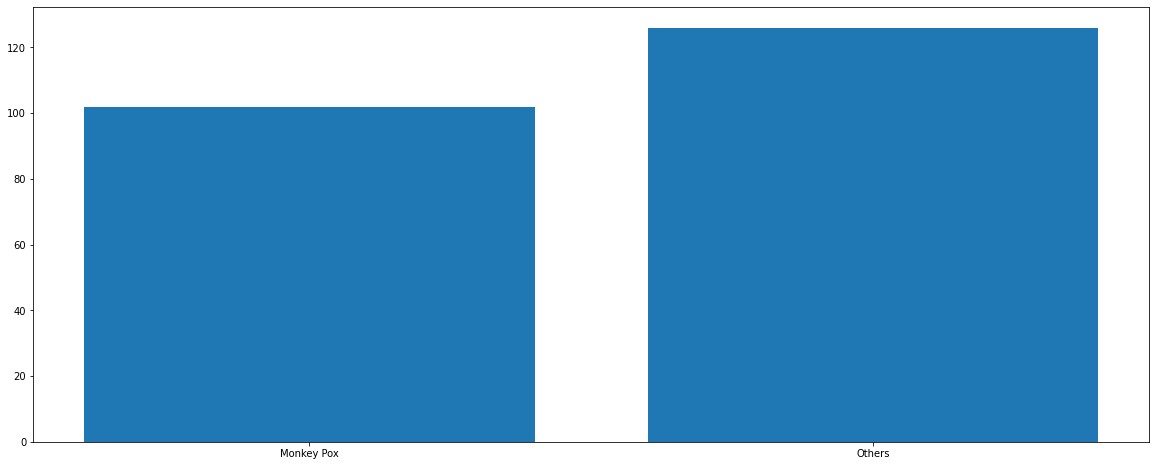

In [154]:
l = [len(os.listdir(x)) for x in label_path.values() ]
plt.figure(figsize=(20, 8))
plt.bar(num_labels.values(), l)


In [155]:
l[0] - l[1]

-24

In [156]:
l

[102, 126]

In [157]:
images_path = {}
for i, j in label_path.items():
    l = []
    for k in os.listdir(j):
        l.append(os.path.join(j, k))
        images_path[i] = l
images_path[1]

['../datasets/monkeypox/Original Images/Original Images/Others/NM01_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM02_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM03_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM04_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM05_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM06_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM07_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM08_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM09_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM100_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM101_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM101_02.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Others/NM102_01.j

In [158]:
import random 
random_images = random.sample(images_path[0], 24)
random_images

['../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M43_03.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M40_03.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M46_02.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M38_02.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M34_02.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M37_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M42_02.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M34_03.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M09_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M29_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M14_01.jpg',
 '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M07_01.jpg',
 '../datasets/monkeypox/Original Images/

In [159]:
import shutil
for i in random_images:
    shutil.copyfile(i, f"{label_path[0]}/{i.split('/')[-1].split('.')[0]}_copy.jpg")

In [160]:
images_path[0][0].split('/')[-1].split('.')[0]

'M01_01'

In [161]:
len(os.listdir(label_path[0])) , len(os.listdir(label_path[0]))

(126, 126)

In [162]:
images_path1 = {}
for i, j in label_path.items():
    l = []
    for k in os.listdir(j):
        l.append(os.path.join(j, k))
        images_path1[i] = l
images_path1

{0: ['../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M01_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M01_02.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M01_03.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M01_04.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M02_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M02_02.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M03_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M04_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M05_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M05_02.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M06_01.jpg',
  '../datasets/monkeypox/Original Images/Original Images/Monkey Pox/M06_02.jpg',
  '../datasets/monkeypox/

# Preproessing the images


In [163]:
img = cv2.imread(images_path[1][2])
img.shape


(224, 224, 3)

In [164]:
def generate_random_images():
    
    random_mp = random.sample(images_path[0], 1)
    random_op = random.sample(images_path[1], 1)
    plt.imshow(mping.imread(random_mp[0]))
    plt.title("Monkey pox")
    plt.figure()
    plt.imshow(mping.imread(random_op[0]))
    plt.title("Other pox")
    plt.figure()

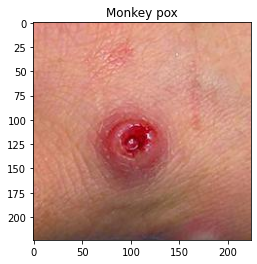

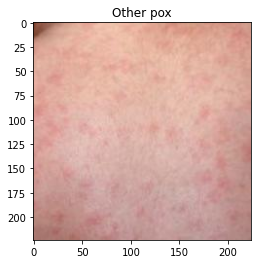

<Figure size 432x288 with 0 Axes>

In [165]:
generate_random_images()

# Creating training and validation dataset 

In [166]:
os.makedirs("../datasets/main_dataset", exist_ok=True)
os.makedirs("../datasets/main_dataset/train", exist_ok=True)
os.makedirs("../datasets/main_dataset/test", exist_ok=True)

In [167]:
BASE_DIR = "../datasets/main_dataset/"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")

In [168]:
for i in labels:
    os.makedirs(f"{TRAIN_DIR}/{i}", exist_ok=True)
    os.makedirs(f"{TEST_DIR}/{i}", exist_ok=True)

In [169]:
labels_ = os.listdir(TRAIN_DIR)
labels_

['Monkey Pox', 'Others']

In [170]:
num_labels_ = {}
for i in range(len(labels_)):
    num_labels_[i] = labels_[i]
num_labels_

{0: 'Monkey Pox', 1: 'Others'}

In [171]:
train_label_path_ = {}
test_label_path_ = {}
for i, j in num_labels_.items():
    train_label_path_[i] = os.path.join(TRAIN_DIR, j)
    test_label_path_[i] = os.path.join(TEST_DIR, j)
test_label_path_

{0: '../datasets/main_dataset/test/Monkey Pox',
 1: '../datasets/main_dataset/test/Others'}

In [172]:
for i, j in images_path1.items():
    mp_test_images = random.sample(images_path1[0], 26)
    op_test_images = random.sample(images_path1[1], 26)
for k in mp_test_images:
    shutil.move(k, test_label_path_[0]+"/"+k.split('/')[-1])
for l in op_test_images:
    shutil.move(l, test_label_path_[1]+"/"+l.split('/')[-1])

In [173]:
mp_test_images = random.sample(images_path1[0], 26)
mp_test_images[0].split('/')[-1]

'M11_01.jpg'

In [176]:
images_path2 = {}
for i, j in label_path.items():
    l = []
    for k in os.listdir(j):
        l.append(os.path.join(j, k))
        images_path2[i] = l
len(images_path2[0])

100

In [178]:
for i, j in images_path2.items():
    mp_test_images = random.sample(images_path2[0], 100)
    op_test_images = random.sample(images_path2[1], 100)
for k in mp_test_images:
    shutil.move(k, train_label_path_[0]+"/"+k.split('/')[-1])
for l in op_test_images:
    shutil.move(l, train_label_path_[1]+"/"+l.split('/')[-1])